In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/seth814/Audio-Classification.git

Cloning into 'Audio-Classification'...
remote: Enumerating objects: 344, done.
remote: Total 344 (delta 0), reused 0 (delta 0), pack-reused 344
Receiving objects: 100% (344/344), 94.87 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as idp
import seaborn as sns
import librosa
import os
import warnings
from tqdm import tqdm

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('/content/Audio-Classification/instruments.csv')

In [0]:
df.head()

fname      label
0  5388d14d.wav  Saxophone
1  c685f05f.wav  Saxophone
2  36d20ab5.wav  Saxophone
3  d6665734.wav  Saxophone
4  7352e28f.wav  Saxophone

In [0]:
df.set_index('fname', inplace=True)

In [0]:
df.head()

label
fname                  
5388d14d.wav  Saxophone
c685f05f.wav  Saxophone
36d20ab5.wav  Saxophone
d6665734.wav  Saxophone
7352e28f.wav  Saxophone

In [0]:
single_audio_path = '/content/Audio-Classification/wavfiles/3c66098d.wav'

In [0]:
signal, rate = librosa.load(single_audio_path, sr=42000)

In [0]:
print(signal.shape)
signal

(225960,)


array([-9.0117217e-05, -1.5527837e-04, -1.4743031e-04, ...,
        1.8582212e-05,  1.1336756e-05, -7.8849998e-06], dtype=float32)

In [0]:
# print(rate)
rate

42000

In [0]:
length = signal.shape[0] / rate

length

5.38

In [0]:
def get_length(x):
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + x, sr= 42000)
  file_length = signal.shape[0] / rate
  return file_length

In [0]:
df.reset_index(inplace=True)

In [0]:
df['length'] = df.fname.apply(get_length)

In [0]:
df.head()

fname      label  length
0  5388d14d.wav  Saxophone    4.14
1  c685f05f.wav  Saxophone    1.54
2  36d20ab5.wav  Saxophone    4.90
3  d6665734.wav  Saxophone   10.50
4  7352e28f.wav  Saxophone    6.24

In [0]:
classes = df.label.unique()

In [0]:
classes = classes.tolist()

In [0]:
classes

['Saxophone',
 'Violin_or_fiddle',
 'Hi-hat',
 'Snare_drum',
 'Acoustic_guitar',
 'Double_bass',
 'Cello',
 'Bass_drum',
 'Flute',
 'Clarinet']

In [0]:
classes_dict = {}

for i in classes:
  file_name = df[df['label'] == i]['fname'].tolist()[0]
  classes_dict[i] = file_name

classes_dict

{'Acoustic_guitar': '17f82c05.wav',
 'Bass_drum': '52e54bdd.wav',
 'Cello': 'e2d993ec.wav',
 'Clarinet': 'a64a3740.wav',
 'Double_bass': 'e6597186.wav',
 'Flute': '18865530.wav',
 'Hi-hat': '078f7ac0.wav',
 'Saxophone': '5388d14d.wav',
 'Snare_drum': '229be2be.wav',
 'Violin_or_fiddle': 'd6144e01.wav'}

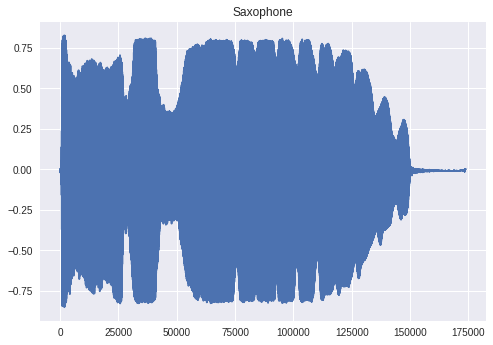

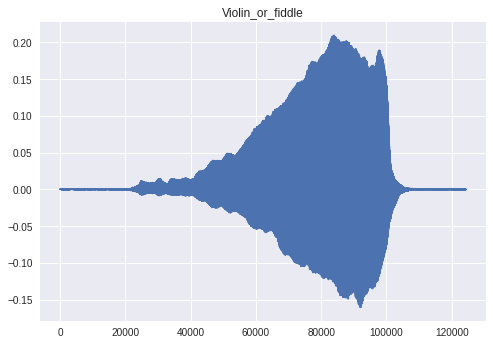

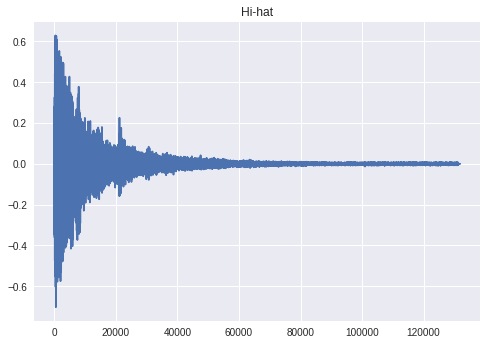

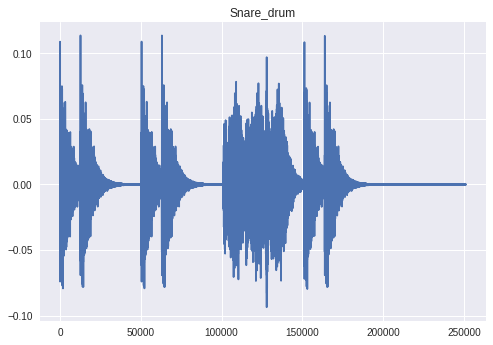

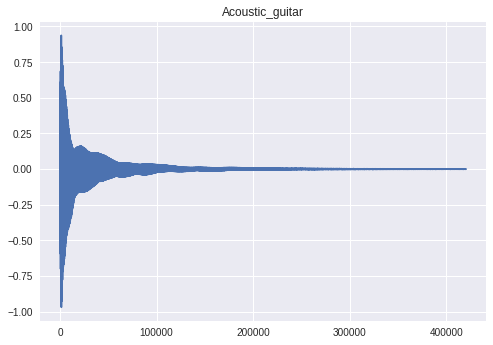

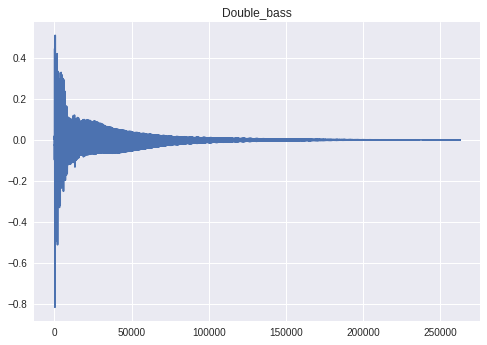

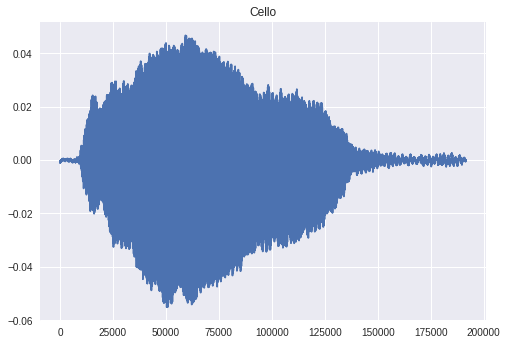

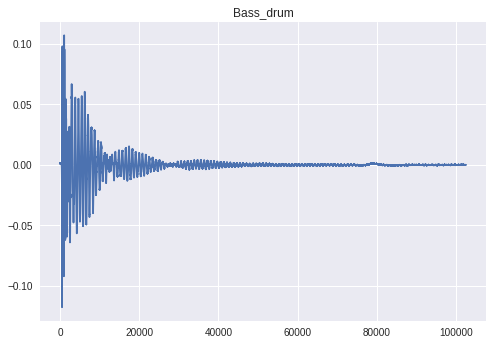

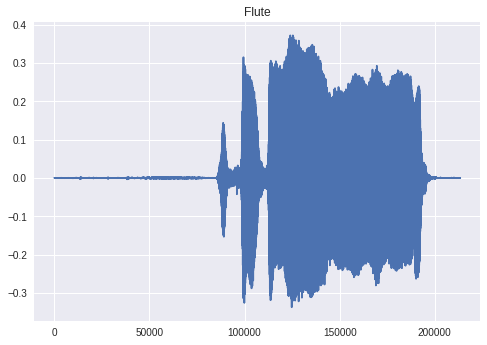

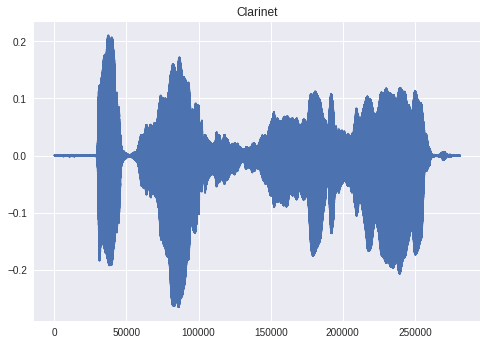

In [0]:
for k, v in classes_dict.items():
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + v, sr=42000)
  # plt.subplot(2, 5, )
  plt.figure()
  plt.title(f'{k}')
  plt.plot(signal)
  plt.show()
  


In [0]:
for k, v in classes_dict.items():
  print(k)
  display(idp.Audio('/content/Audio-Classification/wavfiles/' + v))
  print()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import librosa.display

Saxophone

Violin_or_fiddle

Hi-hat

Snare_drum

Acoustic_guitar

Double_bass

Cello

Bass_drum

Flute

Clarinet



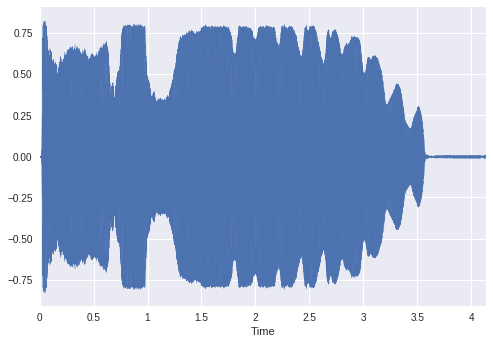

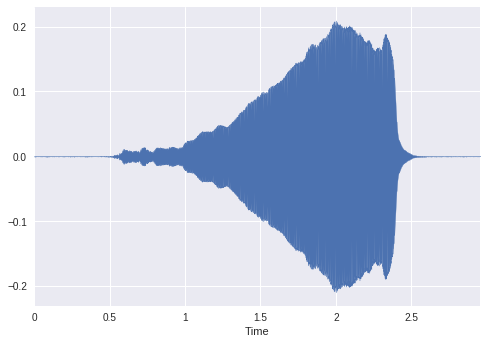

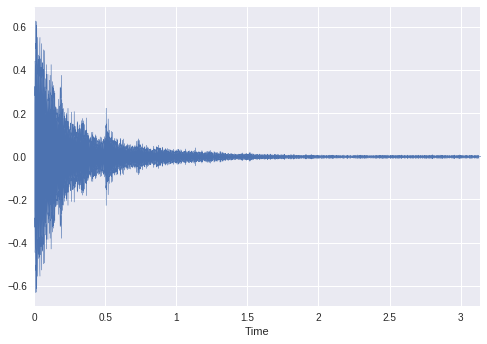

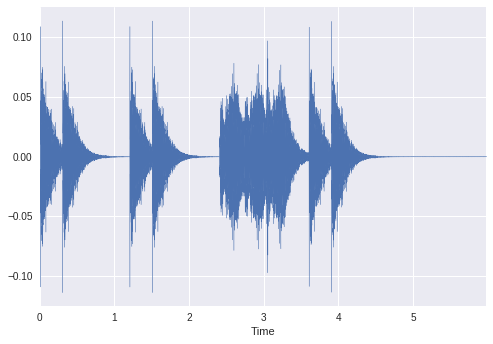

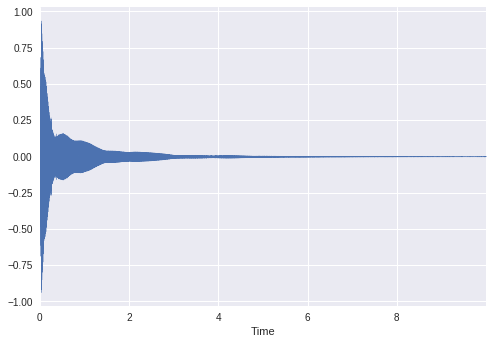

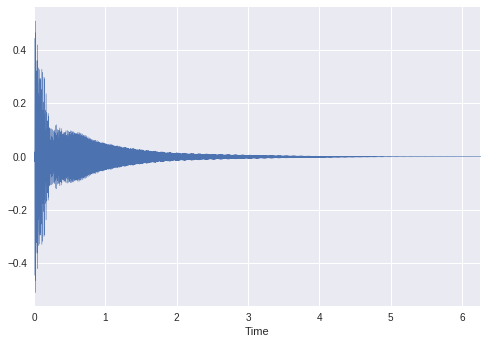

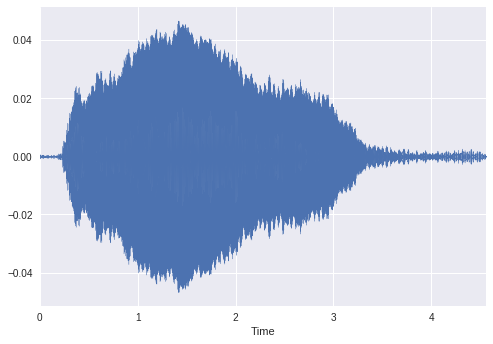

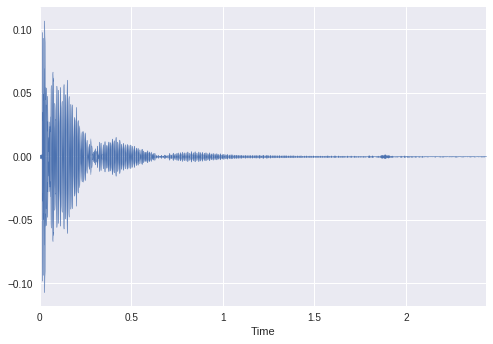

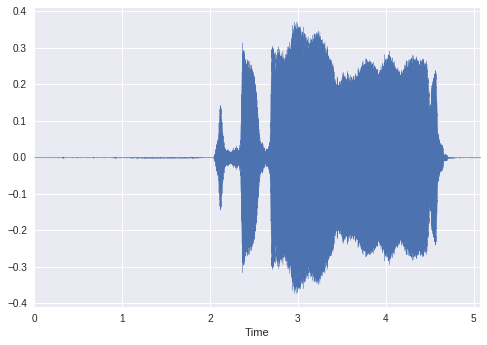

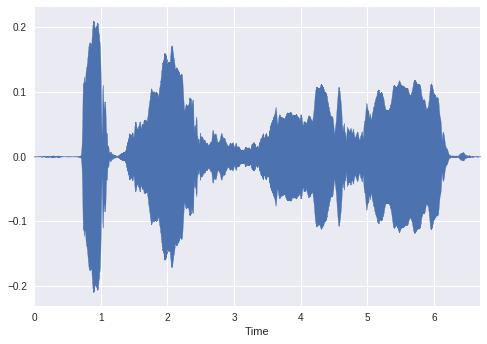

In [0]:
for k, v in classes_dict.items():
  print(k)
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + v, sr=42000)
  plt.figure()
  librosa.display.waveplot(signal, sr=42000)
  print()

## Spectogram

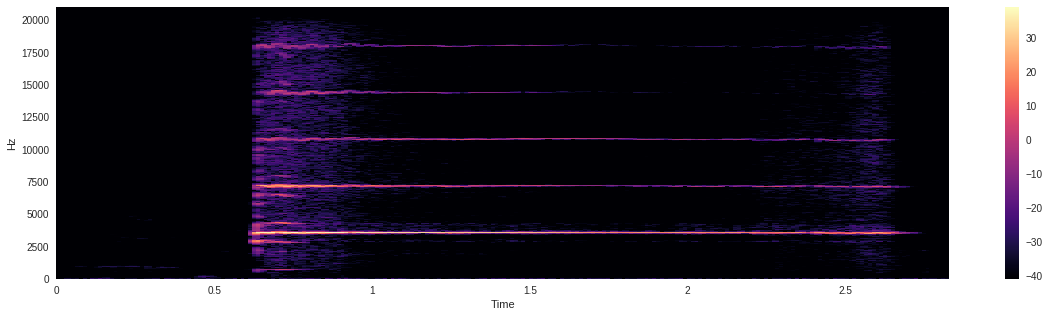

In [0]:
# testing single audio file 
single_audio_path = '/content/Audio-Classification/wavfiles/3c66098d.wav'

signal, rate = librosa.load(single_audio_path)

X = librosa.stft(signal)
xdb = librosa.amplitude_to_db(abs(X))


plt.figure(figsize=(20,5))
librosa.display.specshow(xdb, sr= 42000, x_axis='time', y_axis='hz')
plt.colorbar()

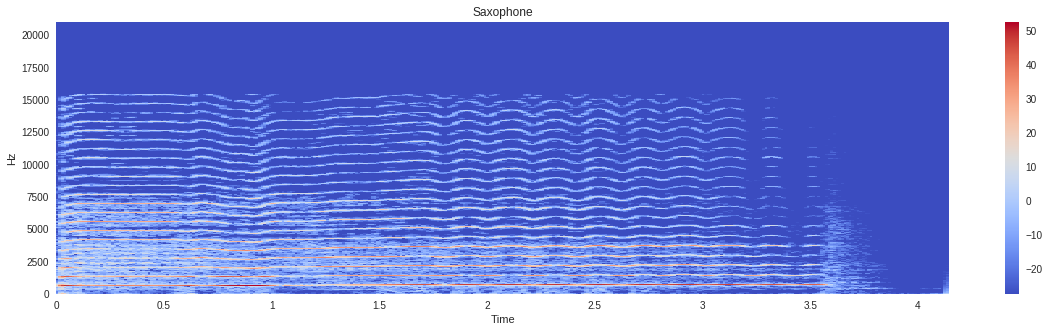

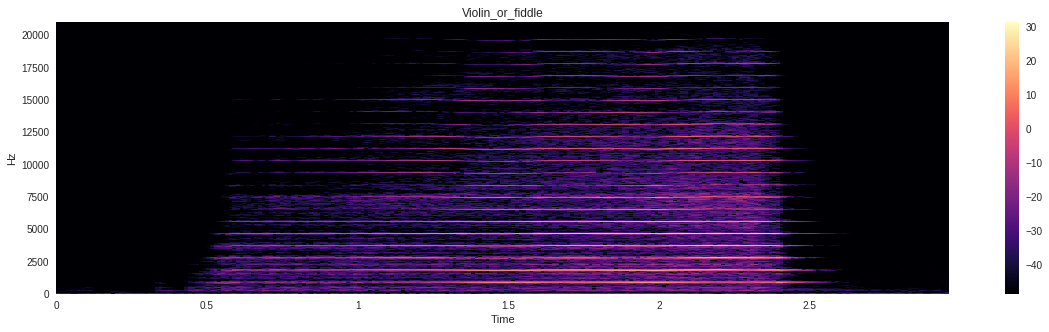

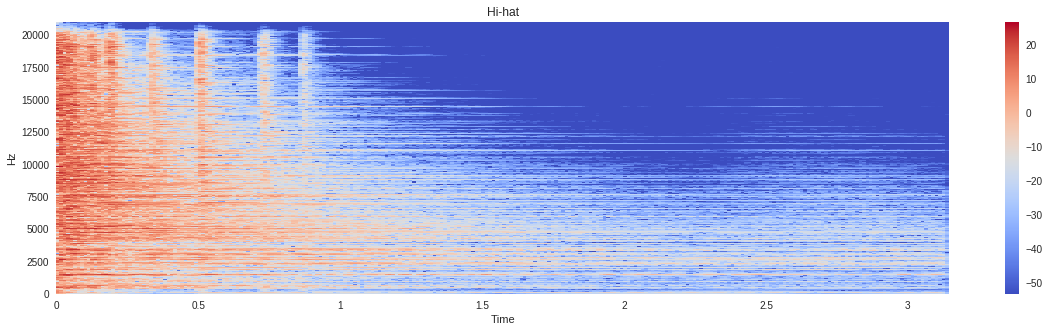

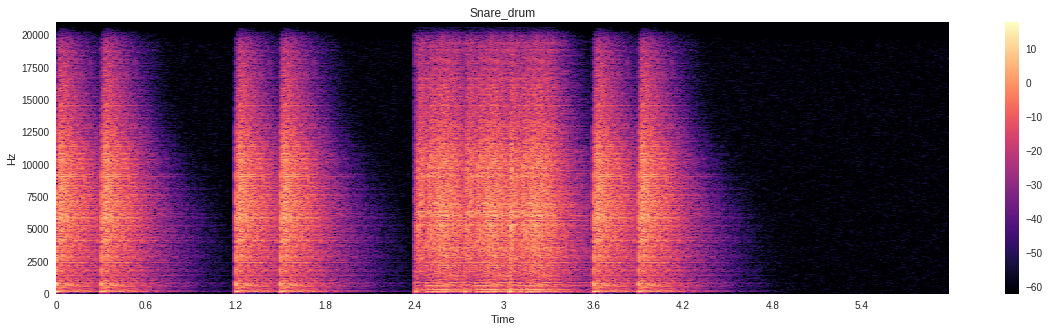

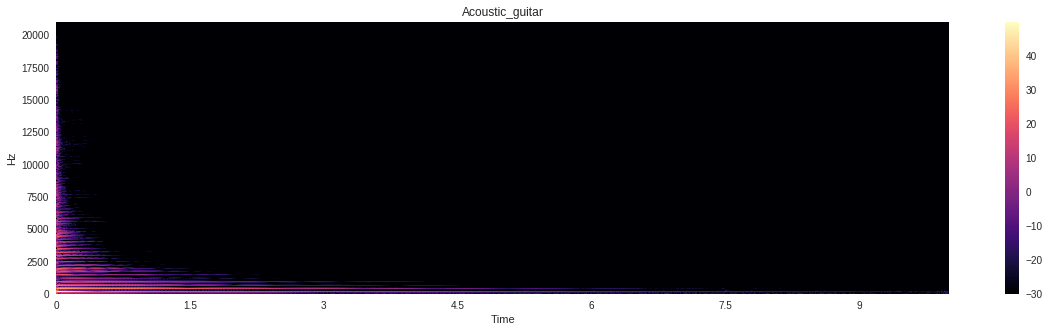

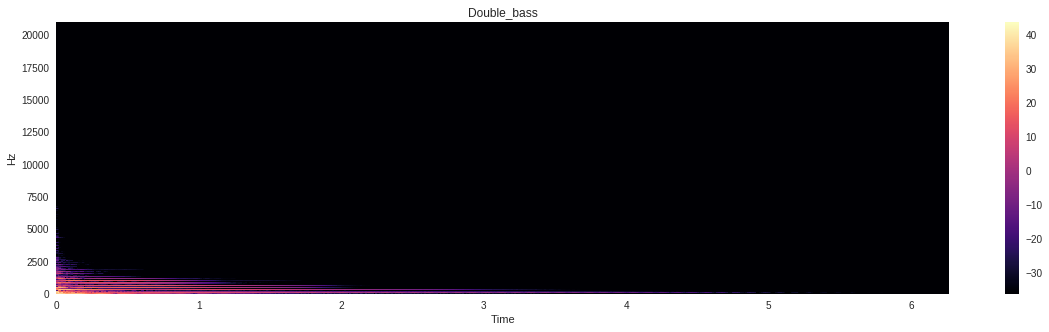

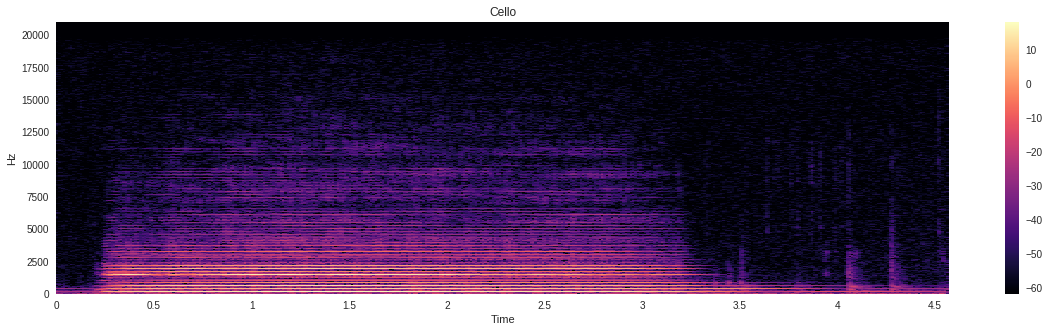

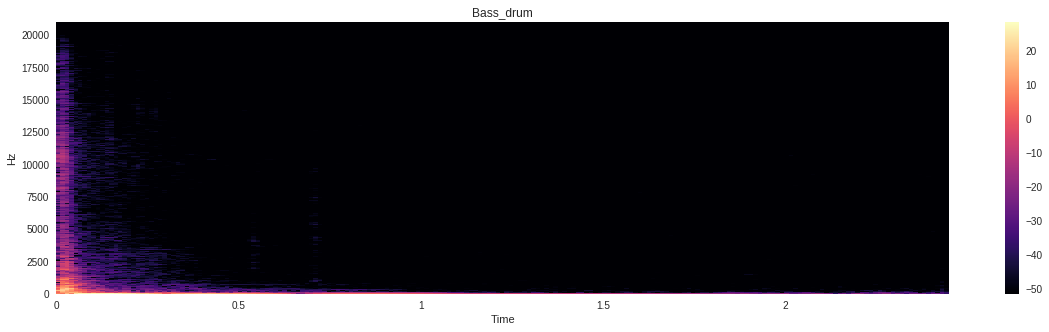

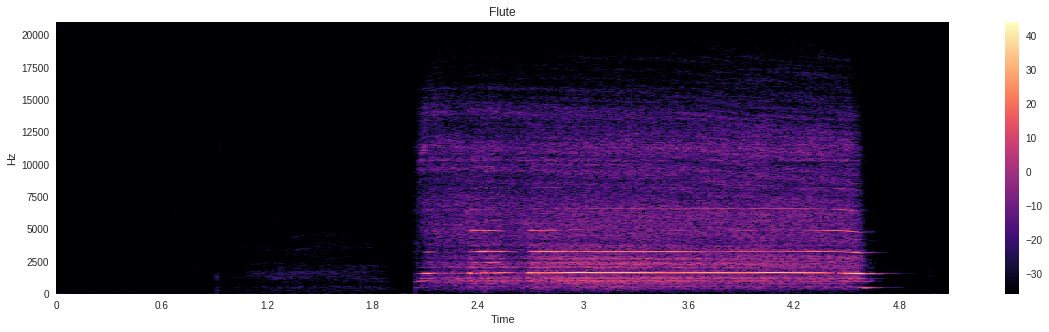

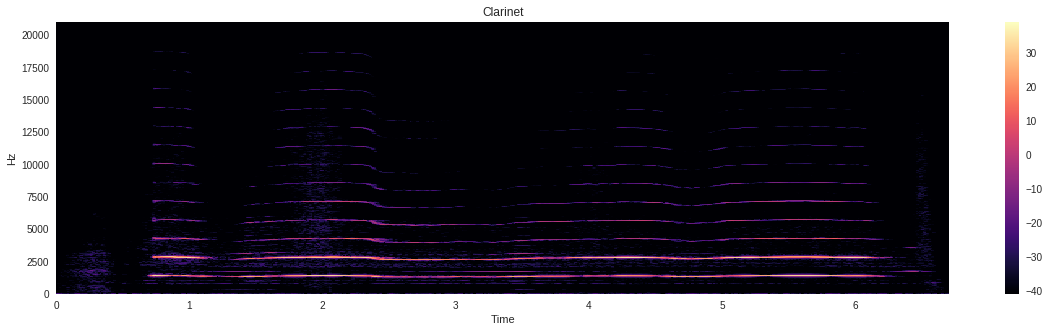

In [0]:
for k, v in classes_dict.items():
  # print(k)
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + v, sr=42000)
  X = librosa.stft(signal)
  xdb = librosa.amplitude_to_db(abs(X))

  plt.figure(figsize=(20,5))
  plt.title(k)
  librosa.display.specshow(xdb, sr= 42000, x_axis='time', y_axis='hz')
  plt.colorbar()
  print()

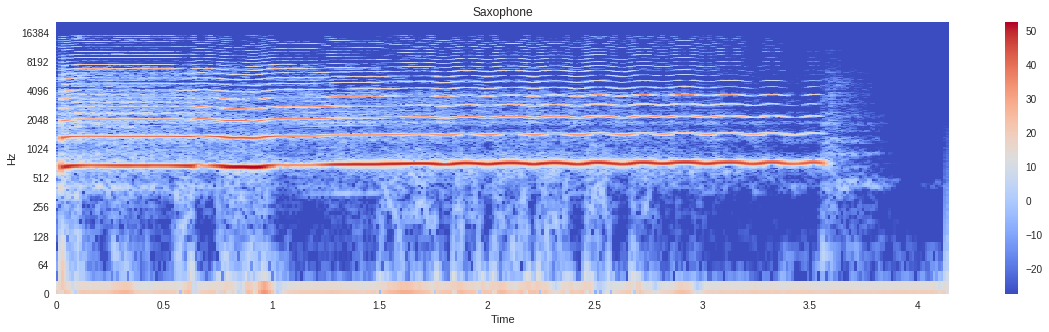

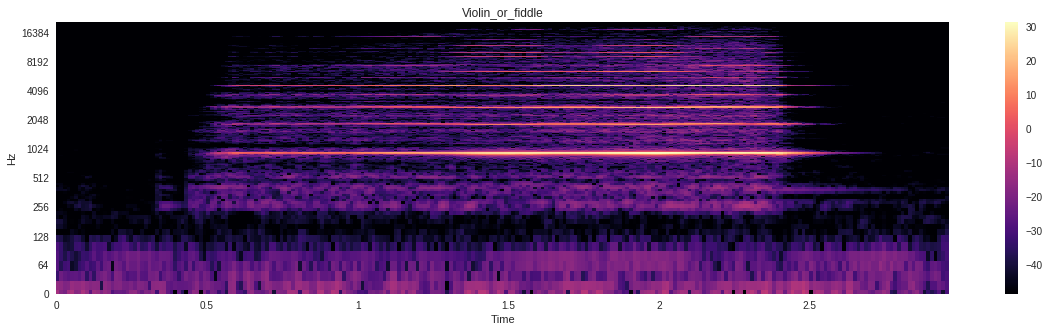

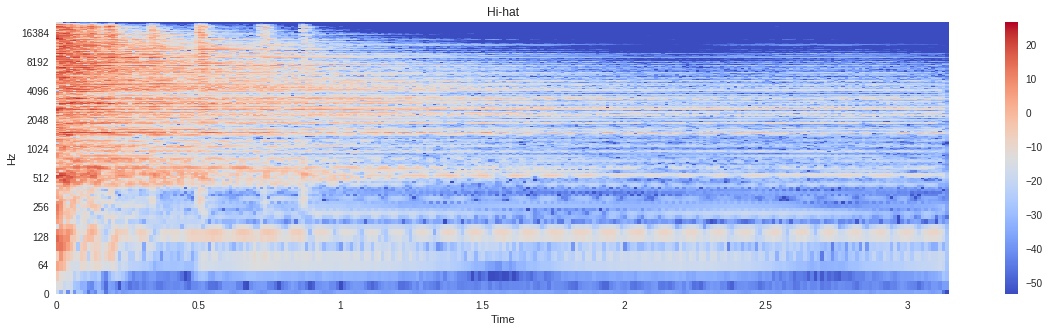

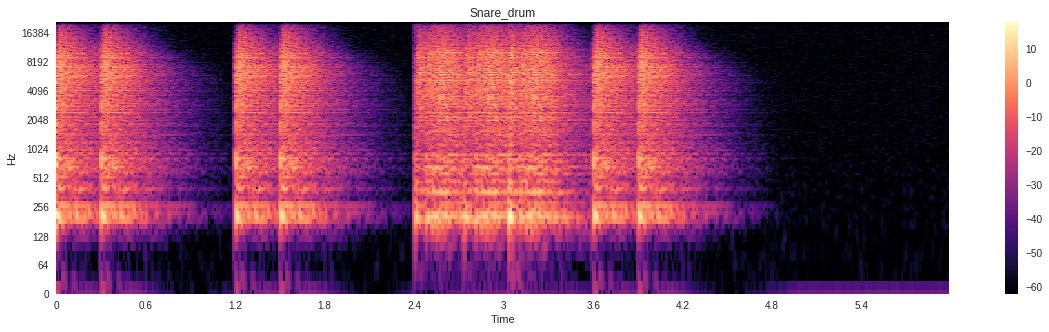

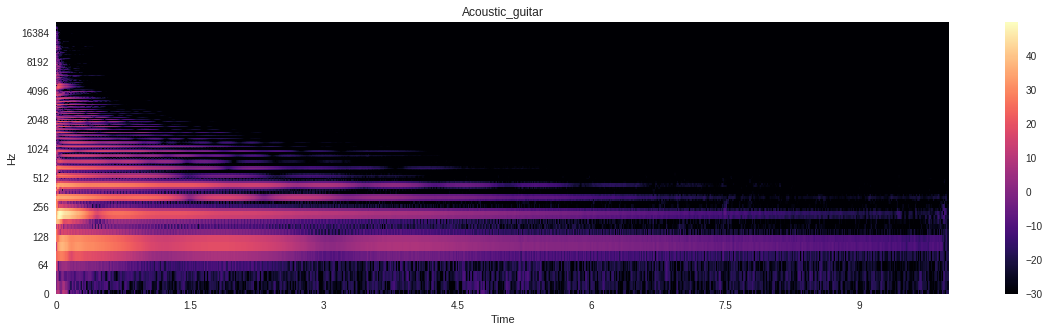

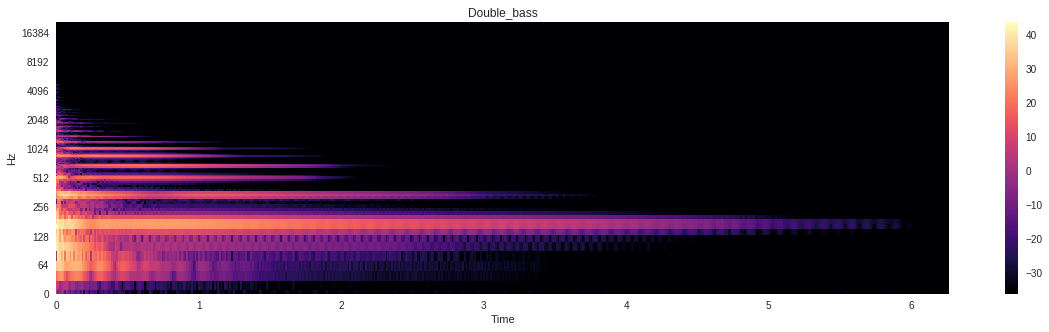

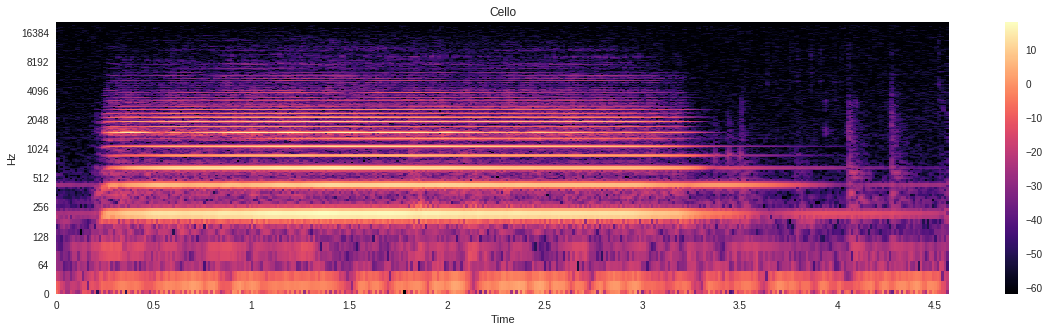

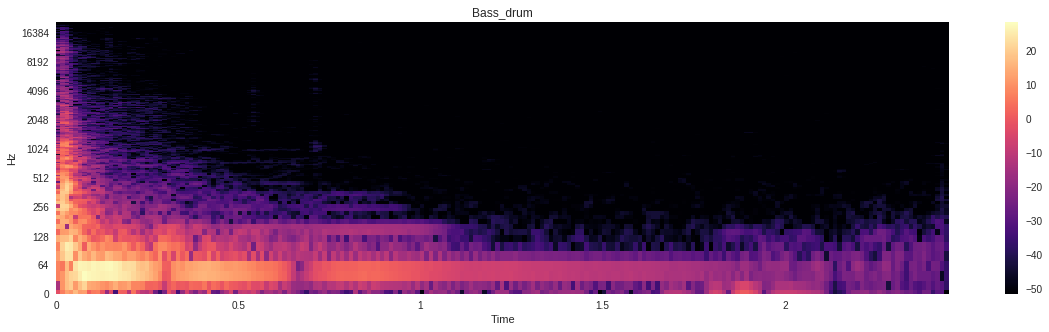

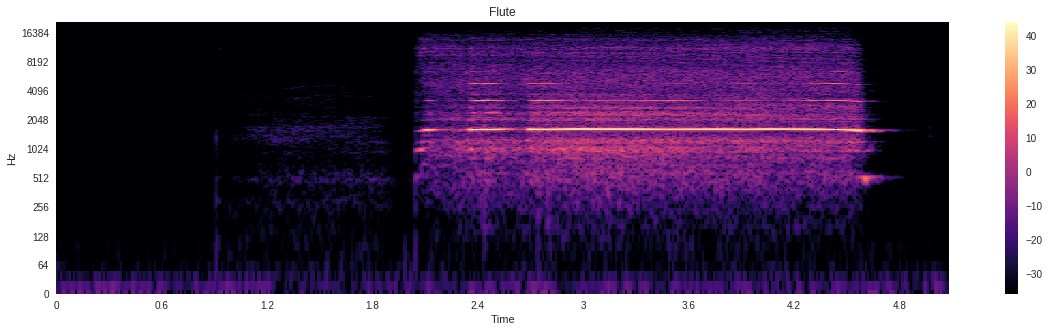

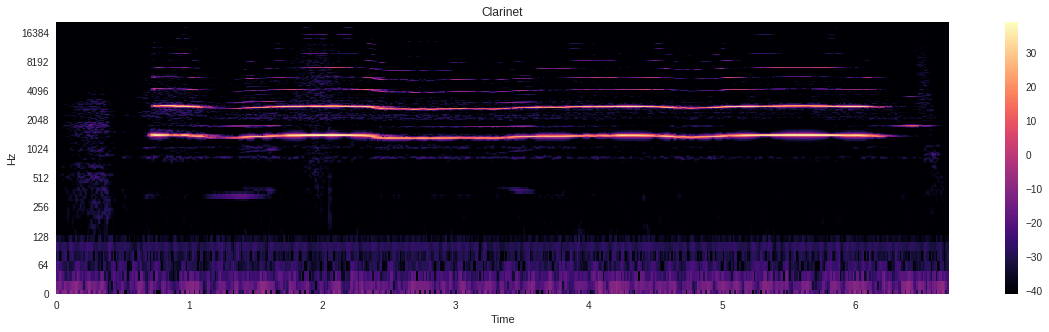

In [0]:
for k, v in classes_dict.items():
  # print(k)
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + v, sr=42000)
  X = librosa.stft(signal)
  xdb = librosa.amplitude_to_db(abs(X))

  plt.figure(figsize=(20,5))
  plt.title(k)
  librosa.display.specshow(xdb, sr= 42000, x_axis='time', y_axis='log')
  plt.colorbar()
  print()

## MFCCS

### Mel Frequency Cepstral Coefficient (MFCC)


(20, 442)


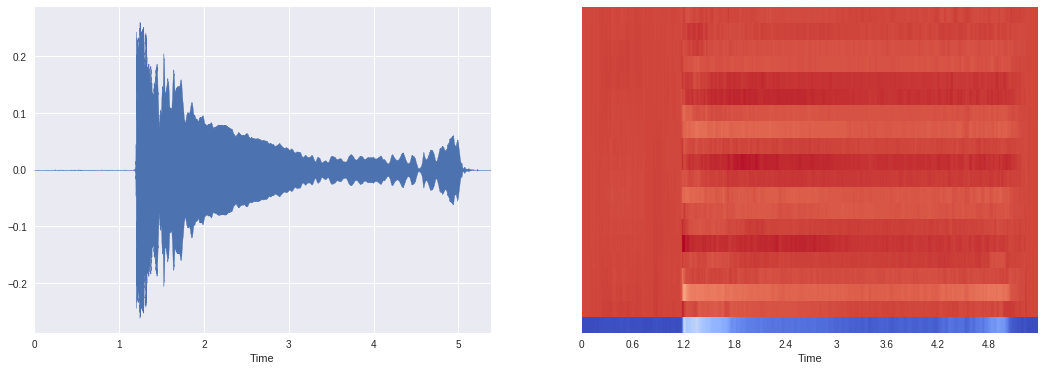

In [0]:
# testing single audio file 
single_audio_path = '/content/Audio-Classification/wavfiles/3c66098d.wav'

signal, rate = librosa.load(single_audio_path, sr=42000)
mfccs = librosa.feature.mfcc(signal, sr= 42000)

print(mfccs.shape)
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
librosa.display.waveplot(signal, sr=42000, x_axis='time')
plt.subplot(1,2,2)
librosa.display.specshow(mfccs, sr= 42000, x_axis='time')

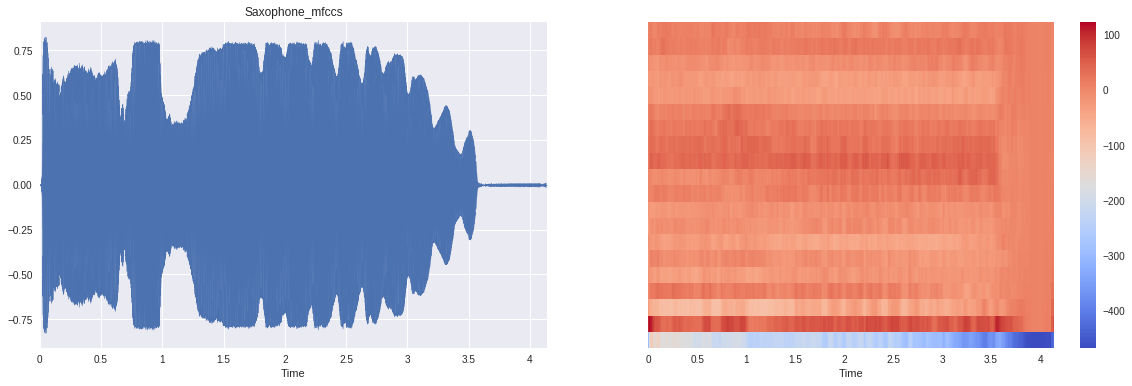

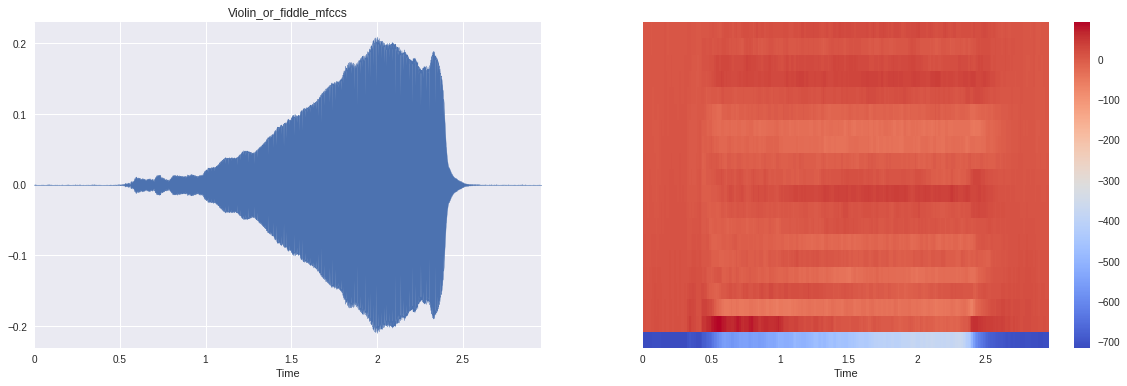

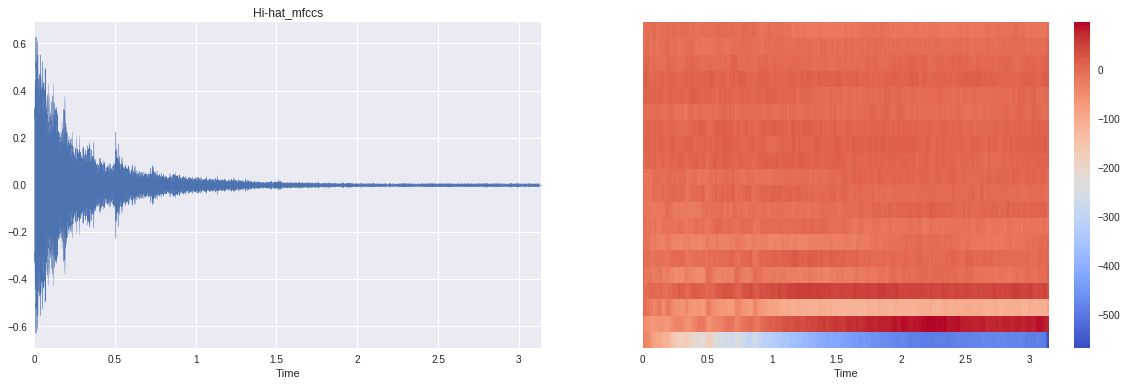

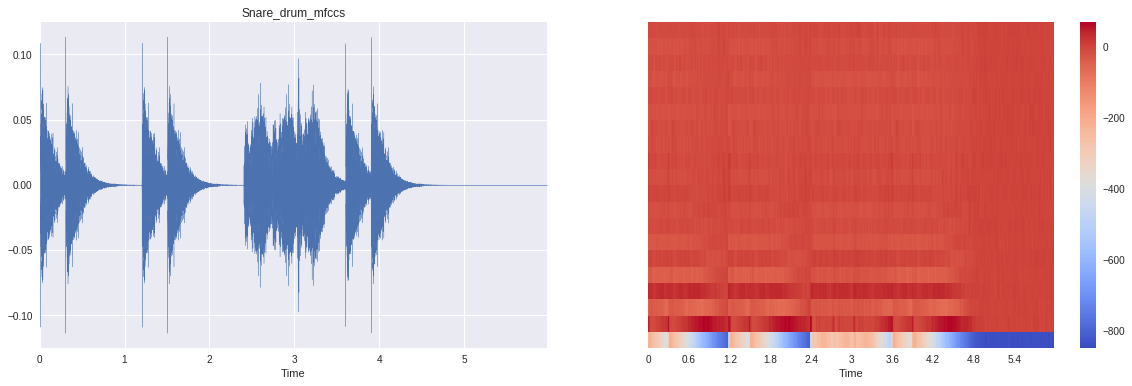

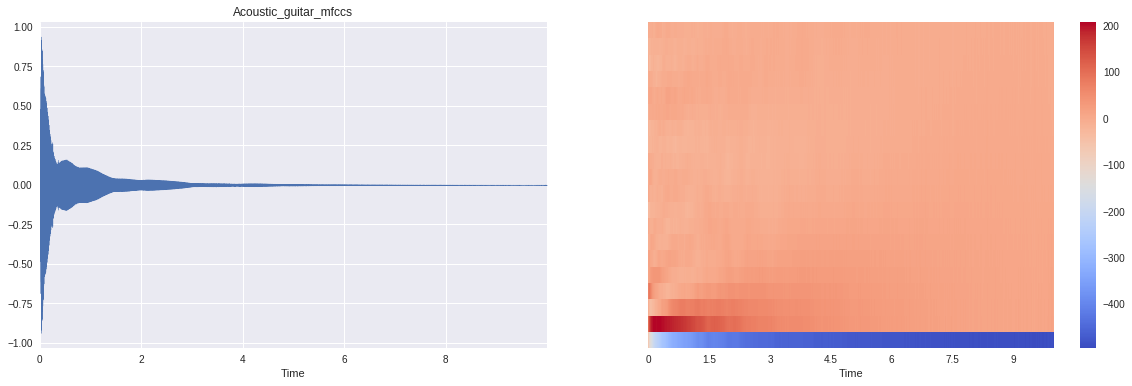

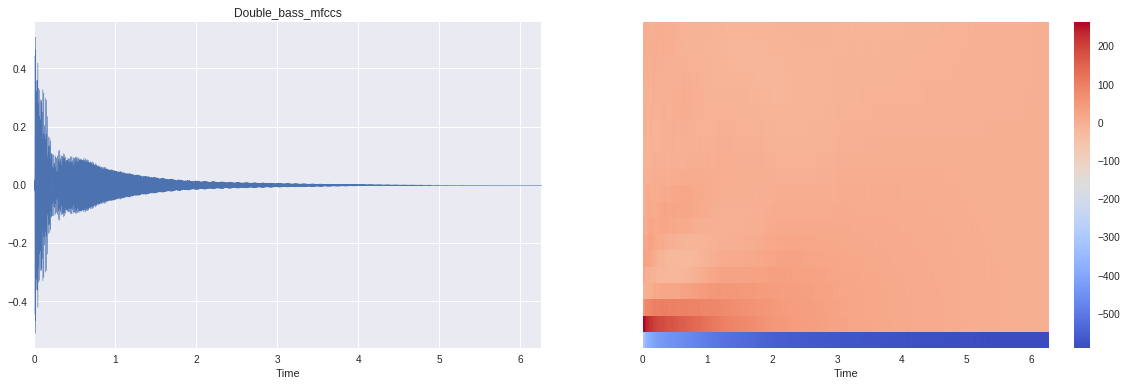

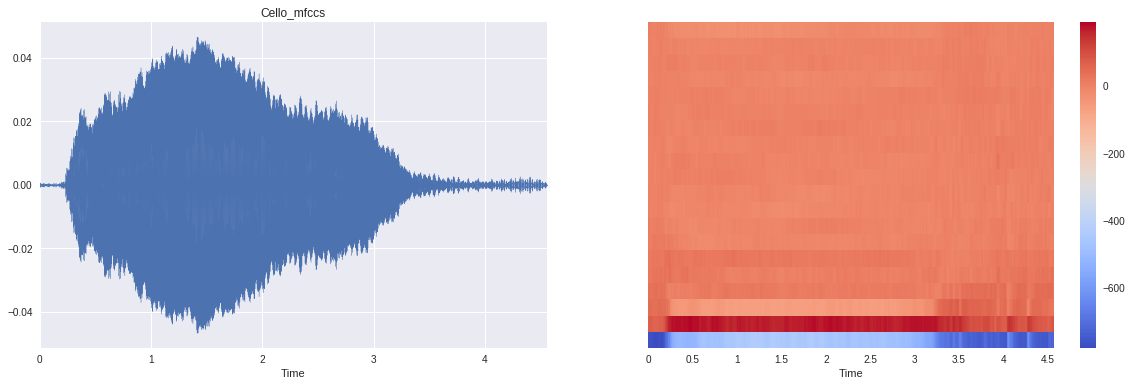

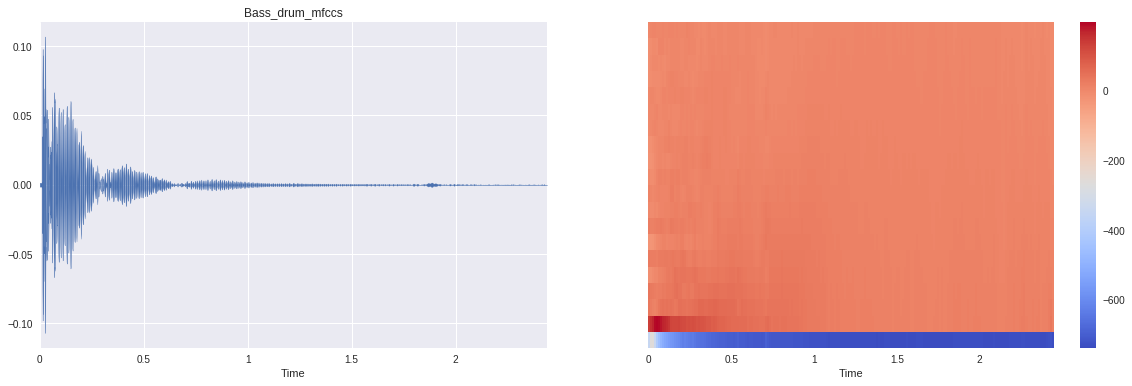

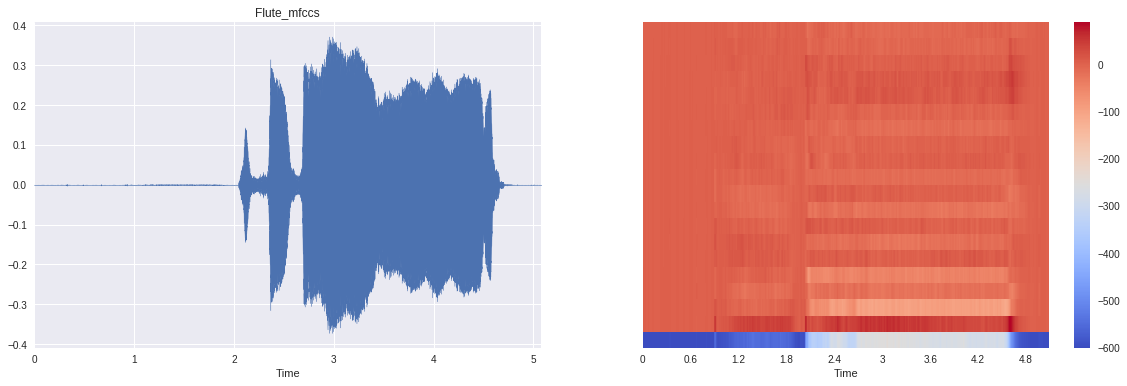

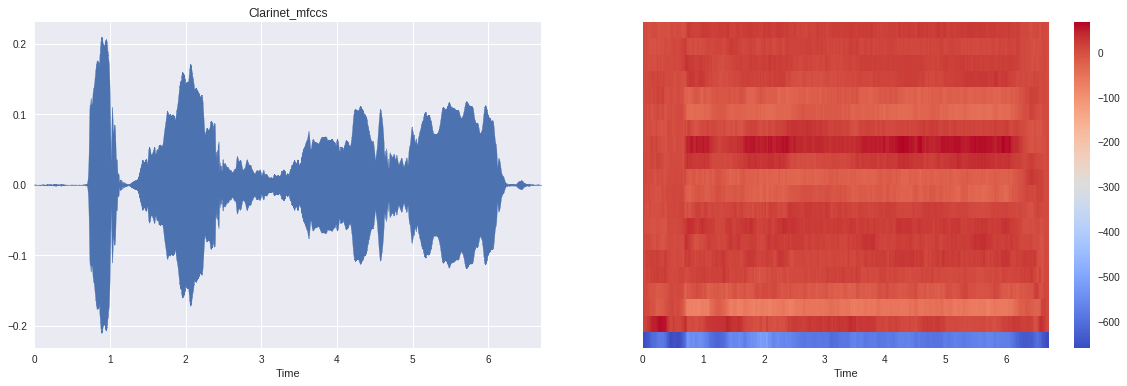

In [0]:
for k, v in classes_dict.items():
  # print(k)
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + v, sr=42000)
  X = librosa.stft(signal)
  xdb = librosa.amplitude_to_db(abs(X))
  mfccs = librosa.feature.mfcc(signal, sr=42000)

  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.title(k)
  librosa.display.waveplot(signal, sr= 42000, x_axis='time')

  plt.title(f'{k}'+'_mfccs')
  plt.subplot(1,2,2)
  librosa.display.specshow(mfccs, sr=42000, x_axis='time')

  # librosa.display.specshow(xdb, sr= 42000, x_axis='time', y_axis='log')
  plt.colorbar()
  print()

## MFCCS with scaling

In [0]:
from sklearn.preprocessing import scale

(20, 442)


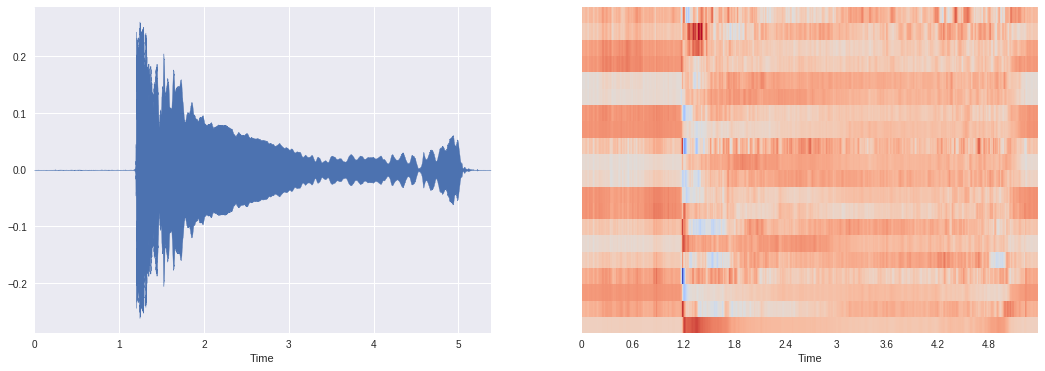

In [0]:
# testing single audio file 
single_audio_path = '/content/Audio-Classification/wavfiles/3c66098d.wav'

signal, rate = librosa.load(single_audio_path, sr=42000)


mfccs = librosa.feature.mfcc(signal, sr= 42000)

mfccs = scale(mfccs, axis=1)

print(mfccs.shape)
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
librosa.display.waveplot(signal, sr=42000, x_axis='time')
plt.subplot(1,2,2)
librosa.display.specshow(mfccs, sr= 42000, x_axis='time')

(20, 442)


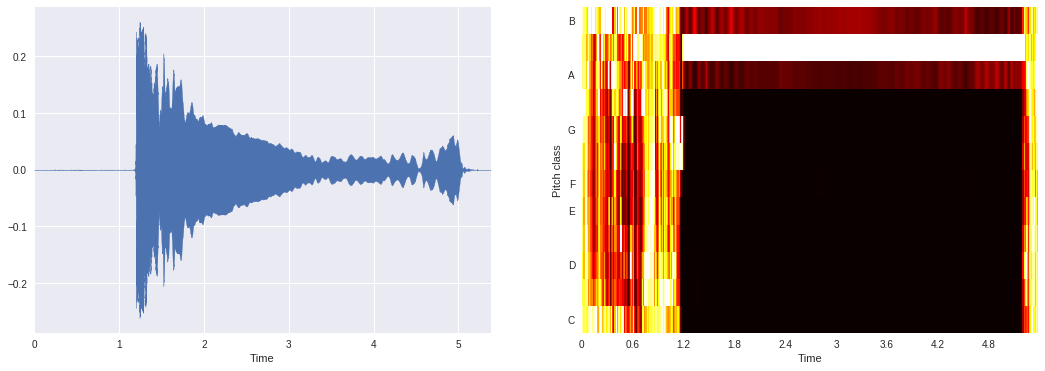

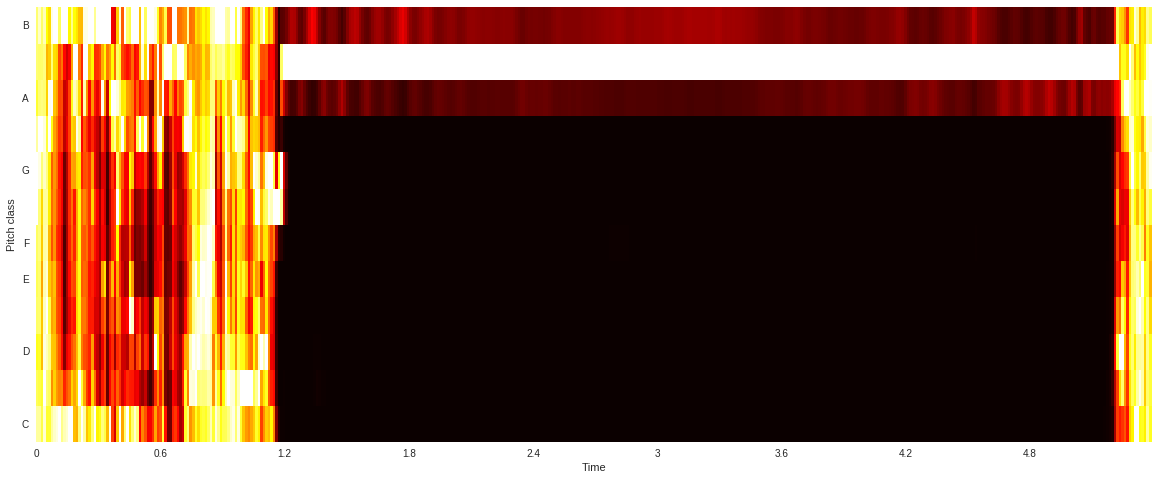

In [0]:
# testing single audio file 
single_audio_path = '/content/Audio-Classification/wavfiles/3c66098d.wav'

signal, rate = librosa.load(single_audio_path, sr=42000)


# mfccs = librosa.feature.mfcc(signal, sr= 42000)
# mfccs = scale(mfccs, axis=1)
chromagram = librosa.feature.chroma_stft(signal, sr=42000)

print(mfccs.shape)
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
librosa.display.waveplot(signal, sr=42000, x_axis='time')
plt.subplot(1,2,2)
librosa.display.specshow(chromagram, sr=42000, x_axis='time', y_axis='chroma', cmap='hot')

plt.figure(figsize=(20,8))
librosa.display.specshow(chromagram, sr=42000, x_axis='time', y_axis='chroma', cmap='hot')

# librosa.display.specshow(mfccs, sr= 42000, x_axis='time')